## Esercizio 2.1

Per misurare l'integrale
$$
I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1
$$
con metodi montecarlo, l'idea è quella di pensarlo nel seguente modo

$$
I = \int_0^1 g(x)p(x)dx
$$

dove $g(x)$ è l'integranda a la $p(x)$ è una distribuzione di probabilità. Ora basta campionare la distribuzione di probabiltà, in ogni punto valutare l'integranda e fare una media dei valori ottenuti trovando l'integrale.

La scelta della distribuzione di probabilità è molto importante, riscriviamo l'integrale generico:

$$
I = \int_0^1 \frac{g(x)p(x)}{d(x)}d(x)dx
$$

Dove ora la $d(x)$ è la distribuzione di probabilità da campionare, questo per dimostrare che con un raccoglimento posso scegliare una distribuzione di probabilità differente cambiando anche l'integranda, ma non il valore dell'integrale. 
Si dimostra che una buona scelta di $d(x)$, riduce notevolente la varianza sul valore dell'integrale. Per buona scelta indendo una distribuzione che assomigli il più possibile all' integranda (importance sampling) mantendo le proprietà di una probabilità, normalizzazione e positività.

Tornando al mio integrale, ho effettuato due misurazioni, ognuna con $M=10^4$ passi montecarlo divisi in $N=100$ blocchi.

1. Nel primo caso ho utilizzato una distribuzione di probabilità uniforme in $(0,1)$

2. Nel secondo caso ho effettuato importance sampling e ho sviluppato l'integranda al quarto ordine


$$\frac{\pi}{2} cos \left( \frac{\pi}{2}x \right) = \frac{\pi}{2} \left( 1 - \frac{\pi^2}{8}x^2 + \frac{\pi^4}{48}x^4 \right)  $$

   Ho sviluppato al quarto ordine perchè al secondo il polinomio non era positivo in tutto $(0,1)$.
   Ho poi calcolato la normalizzazione 


$$
C = \frac{\pi}{2} \left(  1 - \frac{\pi^2}{24} + \frac{\pi^4}{240}  \right)
$$


   e ho ottenuto la distribuzione di probabilità $p(x)$ che desideravo


$$
p(x)=\frac{1}{C} \left(  1 - \frac{\pi^2}{8}x^2 + \frac{\pi^4}{48}x^4 \right)
$$


   L'integrale è diventato della seguente forma


$$
I = \int_0^1 \frac{\pi}{2}  \frac{cos(\pi x/2)}{p(x)} p(x)dx
$$



Riporto di seguito i risulati dell' integrale al variare del numero di blocchi. I grafici mostrano come attraverso l' importance sampling l' incertezza sulle medie sia notevolmente diminuita. In paricolare già dopo pochi passi Monte Carlo nel caso dell' importance sampling l'errore è già ad un ordine di grandezza che nel caso uniforme si presenta dopo circa 50 blocchi.

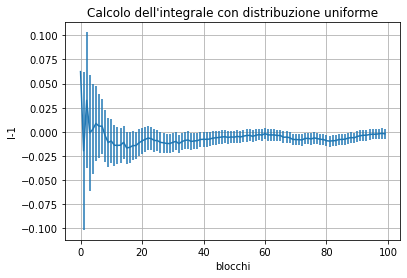

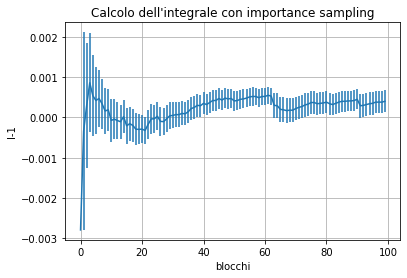

In [12]:
import matplotlib.pyplot as plt
import numpy as np


with open("risultati_int.dat") as out_int:
    Int=np.loadtxt(out_int,usecols=(0,1),dtype=float)
    
with open("risultati_int_px.dat") as out_int_px:
    Int_px=np.loadtxt(out_int_px,usecols=(0,1),dtype=float)
    
x=np.arange(0,100)

plt.errorbar(x,Int[:,0]-1,yerr=Int[:,1])
plt.title("Calcolo dell'integrale con distribuzione uniforme")
plt.xlabel("blocchi")
plt.ylabel("I-1")
plt.grid(True)
plt.show()


plt.errorbar(x,Int_px[:,0]-1,yerr=Int_px[:,1])
plt.title("Calcolo dell'integrale con importance sampling")
plt.xlabel("blocchi")
plt.ylabel("I-1")
plt.grid(True)
plt.show()
